## Text Mining
- 비정형 텍스트 데이터에서 의미를 추출하는 작업
- 자연어처리 기술을 접목해서 최근에는 많이 활용되고 있다
    - (자연어처리 : 사람의 언어를 컴퓨터가 이해할 수 있도록 연구하는 학문)

## Text Mining Process
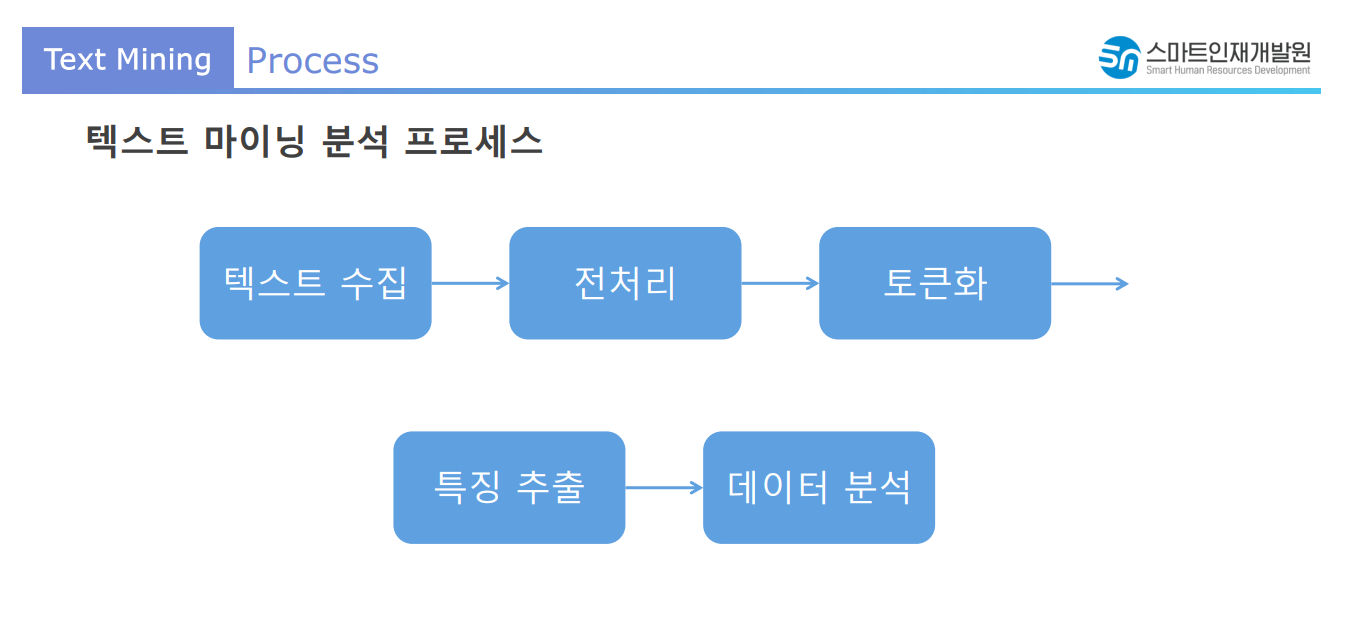

## 텍스트마이닝에서 활용할 분석종류
1. 단어빈도 분석
2. 감성분석 : 텍스트에서 사람의 감정/기분/의견/태도 등을 분석하는 작업
3. 연관성(유사도)분석 : text끼리 연관성이나 유사도를 비교하는 작업

## 1.단어 빈도 분석
- dataset : https://github.com/smilegate-ai/korean_unsmile_dataset

#### 데이터 수집 및 로딩
- 스마일게이트에서 실제 댓글을 모아서 정제한 데이터셋을 활용

In [7]:
# 현재 작업 디렉토리 및 폴더확인
import os
print(os.getcwd()) # 현재 작업폴더를 확인

# 작업디렉토리 내부 폴더 및 파일 확인
print(os.listdir(r'c:\Users\chxss\OneDrive\Desktop\AiSchool\python\ML')) # r로우스트링 : 글자그대로 인식
print(os.listdir(os.getcwd()))

c:\Users\chxss\OneDrive\Desktop\AiSchool\python\ML
['data', 'ex00_머신러닝_복습.ipynb', 'ex01_선형회귀(이론).ipynb', 'ex02_선형회귀(실습).ipynb', 'ex03_선형분류-직원이직예측.ipynb', 'ex04_텍스트마이닝_기초.ipynb']
['data', 'ex00_머신러닝_복습.ipynb', 'ex01_선형회귀(이론).ipynb', 'ex02_선형회귀(실습).ipynb', 'ex03_선형분류-직원이직예측.ipynb', 'ex04_텍스트마이닝_기초.ipynb']


In [8]:
import pandas as pd

In [9]:
# 훈련용, 평가용 데이터 로딩
train = pd.read_csv("./data/unsmile_train_v1.0.tsv", # 파일경로
                    delimiter="\t") # 구분자
test = pd.read_csv("./data/unsmile_train_v1.0.tsv", # 파일경로
                    delimiter='\t') # 구분자

In [10]:
# 데이터 확인
display(train.head(10))
display(test.head(10))

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0
5,고향가서 피방가면 동네 부럴 친구들이랑은 뭐 거르는 거 없이 이야기하니까 막 말하게...,0,0,0,0,0,0,0,0,0,1,0
6,예수 십새끼 개새끼 창녀아들 애비실종 가정교육 못받은 무뇌충 허언증 정신병자 사기꾼...,0,0,0,1,0,1,1,1,0,0,0
7,나이쳐먹고 피시방가는 놈들은 대가리에 똥만찬 놈들임,0,0,0,0,0,0,0,0,1,0,0
8,출산청같은 소리하네. 우리나라 계집들 다 의무적으로 군대보내면 해결될 일이다. 정신...,1,0,0,0,0,0,0,0,0,0,0
9,재능 ㅂㅅㅌㅊ노 ㅋㅋㅋㅋㅋ나도 합성배우고싶다이기,0,0,0,0,0,0,0,0,0,1,0


,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0
5,고향가서 피방가면 동네 부럴 친구들이랑은 뭐 거르는 거 없이 이야기하니까 막 말하게...,0,0,0,0,0,0,0,0,0,1,0
6,예수 십새끼 개새끼 창녀아들 애비실종 가정교육 못받은 무뇌충 허언증 정신병자 사기꾼...,0,0,0,1,0,1,1,1,0,0,0
7,나이쳐먹고 피시방가는 놈들은 대가리에 똥만찬 놈들임,0,0,0,0,0,0,0,0,1,0,0
8,출산청같은 소리하네. 우리나라 계집들 다 의무적으로 군대보내면 해결될 일이다. 정신...,1,0,0,0,0,0,0,0,0,0,0
9,재능 ㅂㅅㅌㅊ노 ㅋㅋㅋㅋㅋ나도 합성배우고싶다이기,0,0,0,0,0,0,0,0,0,1,0


In [11]:
# 결측치
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


None